<a href="https://colab.research.google.com/github/clobos/Andres_ESALQ/blob/main/juncao_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 13.7 MB/s eta 0:00:00


In [ ]:
dados = pd.read_excel('juncao.xlsx')

# Variáveis a serem excluídas
colunas_para_excluir = [
    'Responsáveis',
    'Problemas',
    'Atividades_campus',
    'Motivos_Nsegurança',
    'FrequenciaN',
    'Alt_Segurança',
    'Modal no campus'
]

# Excluir as colunas do DataFrame
dados = dados.drop(columns=colunas_para_excluir, errors='ignore')
print("Variable Names:")
print(dados.columns)

Variable Names:
Index(['Idade', 'Vínculo', 'Sexo', 'Ano_ingresso', 'Curso_grad',
       'Programa_pós', 'Nível', 'Departamento', 'Setor', 'Origem_vist',
       'Frequencia', 'Campus_agradavel', 'Impacto', 'Participação',
       'Particip_fora', 'Interesse', 'Conhecimento', 'Compromisso',
       'Transformador', 'Segurança', 'Alt_seg_noite', 'Distância',
       'Modal_atecampus', 'S_Ilum', 'S_ag', 'S_equ', 'S_vias', 'S_cal',
       'S_acess', 'S_sinal', 'S_ciclovias', 'Aplicativo', 'C_Acol', 'C_pert',
       'C_Sau', 'C_atendaluno', 'C_PAPFE', 'C_moradia', 'C_cre', 'C_gen',
       'C_etn', 'C_aces', 'C_Rucas', 'C_alim', 'C_conv', 'C_esp', 'C_estudo',
       'C_int', 'C_infacd', 'C_orgtrans', 'C_qveic', 'C_visit', 'C_funcio',
       'C_santi', 'C_mobl', 'C_aPSaude', 'Interesse_ativ'],
      dtype='object')


In [ ]:
dados.shape

(690, 57)

In [ ]:
dados['Distância'] = dados['Distância'].astype(str).str.replace('km', '', case=False).str.strip()
dados['Distância'] = pd.to_numeric(dados['Distância'], errors='coerce')
dados.dropna(subset=['Distância'], inplace=True)

# Remover distâncias acima de 200
dados = dados[dados['Distância'] <= 200]

dados['Distância'].describe()

,Distância
count,524.000000
mean,11.208588
std,20.099827
min,0.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,200.000000


In [ ]:
dados['Vínculo'].unique()

array(['Servidor Técnico-Administrativo', 'Visitante Externo',
       'Estudante de Graduação', 'Estudante de Pós Graduação',
       'Docente/Pesquisador'], dtype=object)

In [ ]:
dados['Vínculo'].value_counts()

,count
Vínculo,
Estudante de Graduação,154
Servidor Técnico-Administrativo,153
Estudante de Pós Graduação,92
Docente/Pesquisador,76
Visitante Externo,49


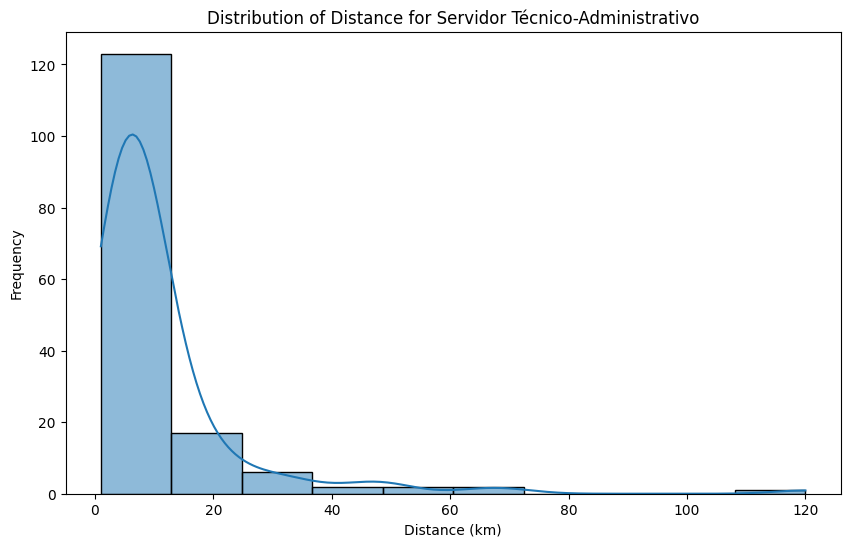

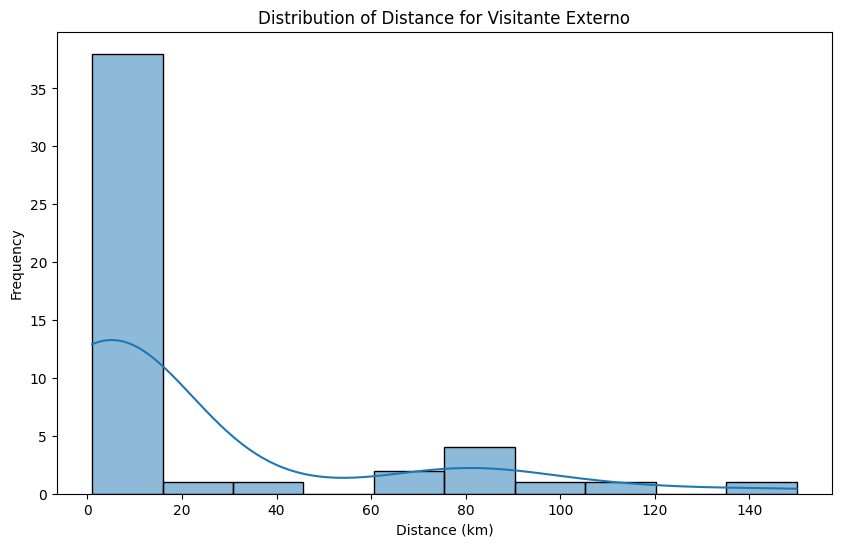

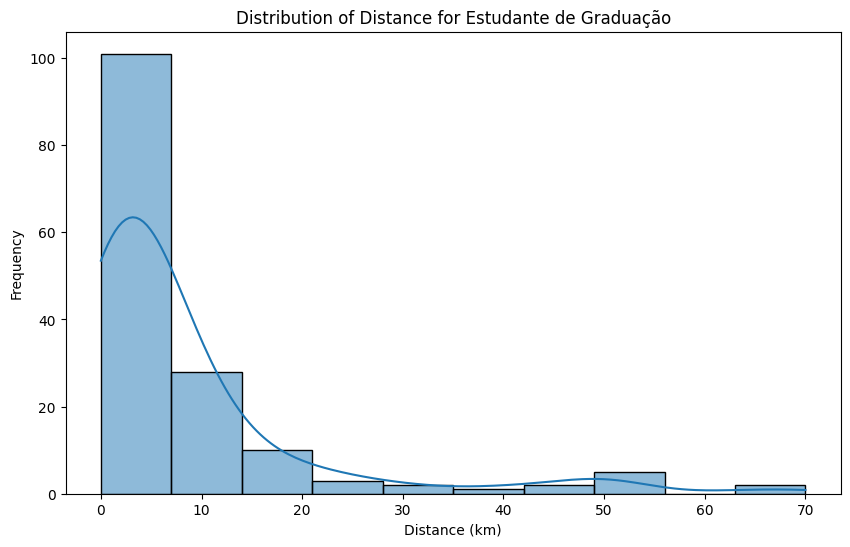

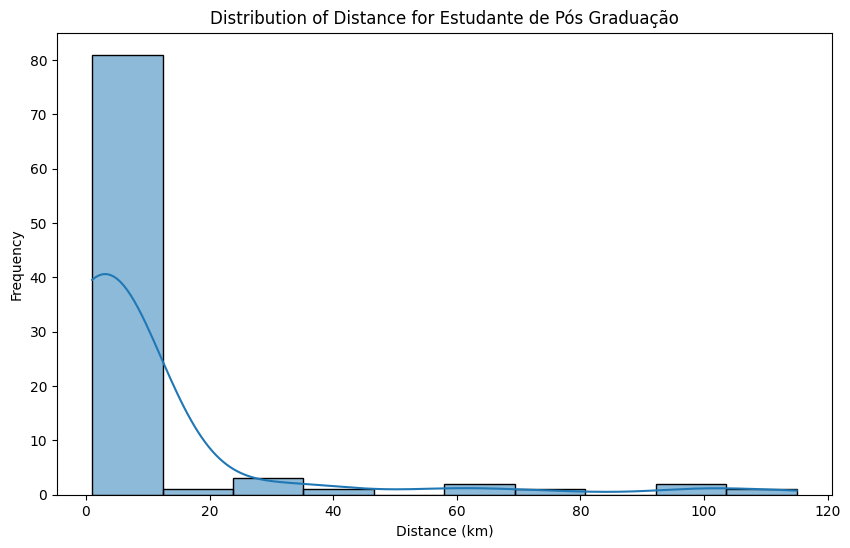

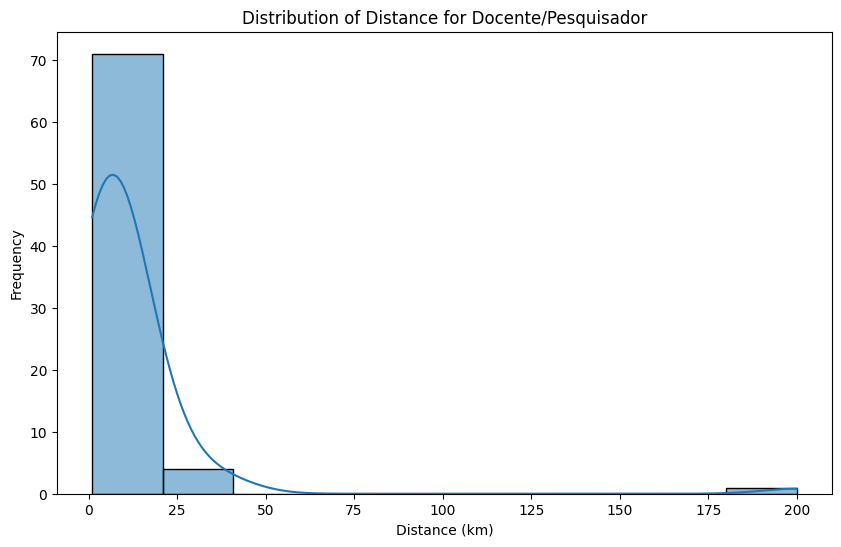

In [ ]:
categorias_vinculo = dados['Vínculo'].unique()

for categoria in categorias_vinculo:
    df_categoria = dados[dados['Vínculo'] == categoria].copy()

    if not df_categoria.empty:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df_categoria, x='Distância', bins=10, kde=True)
        plt.title(f'Distribution of Distance for {categoria}')
        plt.xlabel('Distance (km)')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"No data for category: {categoria}")

In [ ]:
import unidecode

categorias = pd.unique(dados['Vínculo'])
print(categorias)

for categoria in categorias:
    # Clean up the category name for the filename
    cleaned_categoria = unidecode.unidecode(categoria)
    cleaned_categoria = cleaned_categoria.replace(" ", "_")
    cleaned_categoria = cleaned_categoria.replace("-", "_")
    # Remove forward slashes
    cleaned_categoria = cleaned_categoria.replace("/", "_")


    # Filter the DataFrame for the current category
    df_categoria = dados[dados['Vínculo'] == categoria]

    # Save the filtered DataFrame to a CSV file
    file_name = f"{cleaned_categoria}.csv"
    df_categoria.to_csv(file_name, index=False)
    print(f"Saved {file_name}")

['Servidor Técnico-Administrativo' 'Visitante Externo'
 'Estudante de Graduação' 'Estudante de Pós Graduação'
 'Docente/Pesquisador']
Saved Servidor_Tecnico_Administrativo.csv
Saved Visitante_Externo.csv
Saved Estudante_de_Graduacao.csv
Saved Estudante_de_Pos_Graduacao.csv
Saved Docente_Pesquisador.csv
